In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from scipy.optimize import curve_fit

cs = 330.0 # speed of sound in air

In [43]:
def binary_chirp(t, f0, t0):
    return f0 / (t0 - t)**(3.0/8.0)

def find_bestfit_chirp(t, f):
    return curve_fit(binary_chirp, t, f, p0=[f.min(), t.max()])[0]

1.3626415886889682


/tmp/ipykernel_7648/2919435295.py:2: RuntimeWarning: divide by zero encountered in divide
  return f0 / (t0 - t)**(3.0/8.0)
/home/ankur/anaconda3/envs/myenv/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_7648/1043493876.py:16: RuntimeWarning: divide by zero encountered in divide
  plt.plot(t, f0 / (t0 - t)**(3.0/8.0))


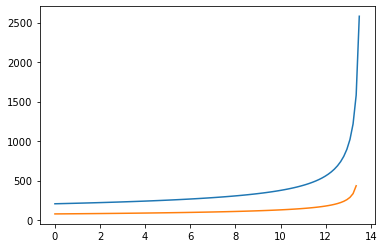

In [47]:
def profile_to_sound(h, r, Qdot, H, Nt=100):
    V = cumtrapz(np.pi * r**2.0, h, initial=0)
    t = np.linspace(0, V[-1] / Qdot, Nt)
    Hfree = H - np.interp(Qdot * t, V, h)
    return t[Hfree>0], cs / Hfree[Hfree>0] / 4.0, V[-1]

h = np.linspace(0,0.4,1000)
r = np.linspace(0.05,0.007,1000)**(5.0/6.0)
r = r / r.max() * 0.05
Qdot = 1e-4 # 20 sec to fill 2 L
H = 0.4
t, f, V = profile_to_sound(h, r, Qdot, H)
print(V * 1000)
plt.plot(t,f)
f0,t0 = find_bestfit_chirp(t,f)
plt.plot(t, f0 / (t0 - t)**(3.0/8.0))
plt.show()

0.0001 0.4
0.00010031961876466937 0.4


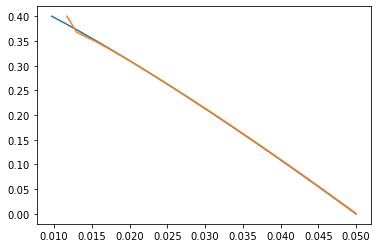

In [37]:
def sound_to_profile(t, f, R=0.05):
    Hfree = cs / f / 4.0
    H = Hfree.max()
    h = H - Hfree
    r = (np.gradient(h, t) * np.pi)**-0.5
    Qdot = (r.max() / R)**-2.0
    r = r / r.max() * R
    return h, r, Qdot, H

plt.plot(r,h)
print(Qdot, H)
h, r, Qdot, H = sound_to_profile(t, f)
print(Qdot, H)
plt.plot(r,h)
plt.show()